In [11]:
import torch
import torch.nn as nn
import torchtext


In [12]:
embedding_dim = 3
context_size = 2
vocab = 40

embedding = nn.Embedding(vocab,embedding_dim)
linear = nn.Linear(context_size*embedding_dim,2)

In [21]:
inputs = torch.tensor([14,13])

my_embeddings = embedding(inputs)


In [22]:
my_embeddings

tensor([[-0.2219, -0.8789,  0.1857],
        [-0.3200, -0.6186, -0.5394]], grad_fn=<EmbeddingBackward0>)

In [9]:
my_embeddings_c = torch.reshape(my_embeddings,
                                (-1,context_size*embedding_dim))

# -1 indicates pytorch to infer the appropriate size for that dimension based on the other dimensions and the total number of elements
linear1 = linear(my_embeddings_c)
linear1

tensor([[ 0.4941, -0.1846]], grad_fn=<AddmmBackward0>)

In [8]:
my_embeddings_c

tensor([[-1.2908,  0.1873,  0.6990, -0.4541,  0.0991, -0.4244]],
       grad_fn=<ViewBackward0>)

In [29]:
 torch.__version__,torchtext.__version__

('2.2.2', '0.17.2')

In [30]:
import numpy as np

In [32]:
np.__version__

'1.26.0'

## Importing Libraries

In [34]:
import warnings
from tqdm import tqdm

warnings.simplefilter('ignore')
import time
from collections import OrderedDict

import re # re --> regular expression

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


import nltk
nltk.download('punkt')
nltk.download('punkt_tab')

import torch
import torch.nn as nn
import torch.nn.functional as f
import torch.optim as optim
import string
import time

import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

def warn(*args,**kwargs):
    pass
import warnings
warnings.warn = warn

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/tinonturjamajumder/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     /Users/tinonturjamajumder/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


## Defining Helper Functions

Remove all non-word characters (everything except numbers and letters)

In [35]:
def process_string(s):
    # for more see here: [https://chatgpt.com/c/681c88f6-1a50-8005-973d-f91fae824638]

    # replace everything apart from words and digits, {\w --> letters(a-z & A-Z)} {\s--> digits} ^ --> neglects
    s = re.sub(r"[^\w\s]",'',s)

    # replace all runs of whitespace with no space
    s = re.sub(r"\s+",'',s)

    # replace digits with no space
    s = re.sub(r"\d",'',s)

    return s

In [39]:
text = "Hello world! Version 2.0>>"
processed_text = process_string(text)
processed_text

'HelloworldVersion'

## Language Modeling

In [40]:
song = """We are no strangers to love
You know the rules and so do I
A full commitments what Im thinking of
You wouldnt get this from any other guy
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
And if you ask me how Im feeling
Dont tell me youre too blind to see
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Weve known each other for so long
Your hearts been aching but youre too shy to say it
Inside we both know whats been going on
We know the game and were gonna play it
I just wanna tell you how Im feeling
Gotta make you understand
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you
Never gonna give you up
Never gonna let you down
Never gonna run around and desert you
Never gonna make you cry
Never gonna say goodbye
Never gonna tell a lie and hurt you"""

## TOKENIZATION

In [54]:
from nltk.tokenize import word_tokenize

def preprocess(words):
    tokens = word_tokenize(words)
    tokens = [process_string(w) for w in tokens] # remove any space/digit/sign in tokenize words

    return [w.lower() for w in tokens if len(w)!=0 or not (w in string.punctuation)]
    

song_tokens = preprocess(song)

In [55]:
song_tokens[0:10]

['we', 'are', 'no', 'strangers', 'to', 'love', 'you', 'know', 'the', 'rules']

In [51]:
def preprocess_without(words):
    tokens = word_tokenize(words)
    return tokens
tokens_without = preprocess_without(song)
tokens_without[10:40]

['and',
 'so',
 'do',
 'I',
 'A',
 'full',
 'commitments',
 'what',
 'Im',
 'thinking',
 'of',
 'You',
 'wouldnt',
 'get',
 'this',
 'from',
 'any',
 'other',
 'guy',
 'I',
 'just',
 'wan',
 'na',
 'tell',
 'you',
 'how',
 'Im',
 'feeling',
 'Got',
 'ta']

In [52]:
text = 'I like dogs and I kinda like cats'
tokens = preprocess(text)
tokens

['i', 'like', 'dogs', 'and', 'i', 'kinda', 'like', 'cats']

Utilize```NLTK's FreqDist```to transform a frequency distribution of words. The outcome is a Python dictionary where the keys correspond to words, and the values indicate the frequency of each word's appearance. Please consider the provided example below.


In [53]:
# Create a frequency distribution of words
fdist = nltk.FreqDist(tokens)
fdist

FreqDist({'i': 2, 'like': 2, 'dogs': 1, 'and': 1, 'kinda': 1, 'cats': 1})

In [56]:
song_fdist = nltk.FreqDist(song_tokens)
song_fdist

FreqDist({'na': 40, 'gon': 38, 'you': 37, 'never': 36, 'and': 16, 'tell': 9, 'make': 8, 'say': 8, 'a': 7, 'give': 6, ...})

### Plot the words with the top ten frequencies

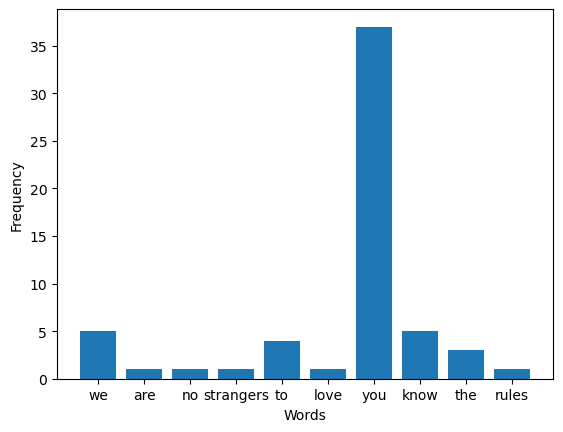

In [57]:
plt.bar(list(song_fdist.keys())[0:10],list(song_fdist.values())[0:10])
plt.xlabel("Words")
plt.ylabel("Frequency")
plt.show()

## Unigram Model

In [59]:
# total count of each word
C = sum(song_fdist.values())
C

385

In [61]:
song_fdist['strangers']/C

0.0025974025974025974

## Bigram Models

In [62]:
bigrams = nltk.bigrams(song_tokens)
bigrams

<generator object bigrams at 0x314579fc0>

In [65]:
my_bigrams = list(nltk.bigrams(song_tokens))[0:10]
my_bigrams

[('we', 'are'),
 ('are', 'no'),
 ('no', 'strangers'),
 ('strangers', 'to'),
 ('to', 'love'),
 ('love', 'you'),
 ('you', 'know'),
 ('know', 'the'),
 ('the', 'rules'),
 ('rules', 'and')]